# General landscape of machine learning

## Machine Learning (ML)

Machine learning is the science of using computer to predict outcomes without being explicitly programmed.
The basic idea behind machine learning is to build algorithms based on statistical analysis that takes input data and predict an output value or response. In order to create a model we have to chose type of model that fits to our problem and subsequently we **train** the model using **training data**. 

There are two main types of ML algorithms: **supervised** and **unsupervised**. 
**Supervised algorithms**  require both input and known output during the process of training. Once training is completed, the model can be used to a new dataset to predict outcome.
**Unsupervised algorithms** do not require output in the process of training, they are used to discover pattern in the data.

Second main distinction between models is related to type of output. Your output can take **continuous** values, e.g., house price, IQ score, or can take **categorical** values, e.g. spam or not spam email, malignant or benign tumor.

Therefore, there are four main types of problems in ML:


<img src="../img/superv_unsuperv.png", width=600>

## Scikit-learn

[Scikit-learn](http://scikit-learn.org/stable/) is a great Python library that allows for ease use the standard machine learning algorithms. It is also build on top of other commonly used scientific libraries like NumPy, SciPy, and matplotlib.
Below there is a scikit-learn cheat sheet that again addresses the main classification of ML algorithms and can be used as a rough guide on how to approach problems.

<img src="../img/scikit-type.png", width=800>

Let's try to import sklearn and check some available datasets. 

In [1]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

X_can = cancer.data
y_can = cancer.target

print(X_can.shape)
print(y_can.shape)

(569, 30)
(569,)


You can see that input data ``X`` is a 2-dimensional array and the output (or response) is a one dimensional array. We can say that ``569`` is a number of available samples and ``30`` is a number of features.

For this dataset we can also access a short description:

In [2]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

You can see names of all features and two output classes. So we expect that the response vector will have 2 values only and we can easily check it:

In [3]:
import numpy as np
np.unique(y_can)

array([0, 1])

``datasets`` offers also a dataset generator. Let's try to generate and plot data with 30 samples and 1 feature. 

**Note**, that I will use both ``matplotlib`` and ``seaborn`` in the notebook, you can experiment with both libaries and various options.

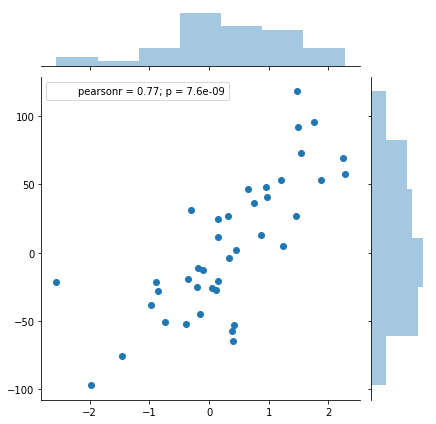

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

X, y = datasets.make_regression(n_samples=40, n_features=1, n_informative=1, random_state=0, noise=40)

# using seaborn you can plot the distributions
sns.jointplot(x=X[:,0], y=y);

You can also use seaborn to fit a function to your data:

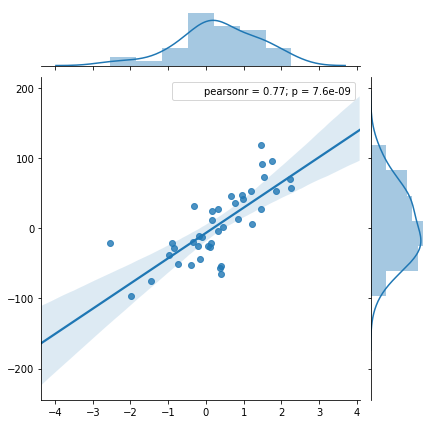

In [5]:
sns.jointplot(x=X[:,0], y=y, kind='reg');

But from now we will use algorithm that are provided in ``scikit-learn``.

## Linear regression 

Linear Regression is the most common algorithm for supervised learning if the output is continuous. The algorithm solves **optimization problem**, it minimizes the following cost function:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(\hat{f}(x)^i - y^{i} \right)^2$$ 

where $y^{i}$ is the true value and $\hat{f}(x)^{i}$ is a predicted value for $i$ sample ($m$ - total number of samples) that can be written:

$$\hat{f}(x)^i = \theta_0 + \theta_1 x_1^i + \theta_2 x_2^i + ...$$

$x^i_n$ represents the value of $n$ feature for $i$ sample and $\theta_n$ are parameters of the linear model, that are derived to minimize the cost function. 

We can use the matrix form (a column of ones is usually added to input matrix $X$ to multiply $\theta_0$):

$$\hat{f}(X) = X \theta$$

We can now use ``LinearRegression`` model implemented in sikit-learn to fit to the generated data that has only one feature. The data will be used as training data to build the model:

In [6]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can check the parameters of the model $\theta_0$ and $\theta_1$:

In [7]:
print(regr.intercept_, regr.coef_)

-6.86900346757 [ 35.96831373]


And now we can plot the linear function defined by the model coefficients:

And plot again training data with fitted function:

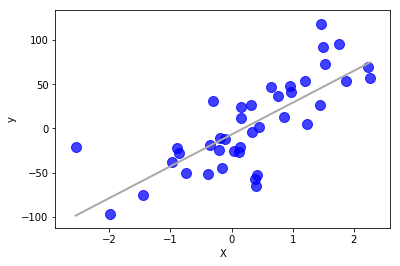

In [8]:
def plot_regr(X, y, model, color="b"):
    fig, ax = plt.subplots()
    
    X_pr = np.linspace(X[:,0].min(), X[:,0].max(), 100)[:, np.newaxis]
    y_pr = model.predict(X_pr)
    ax.plot(X_pr, y_pr, color='darkgrey', linewidth=2)
    ax.scatter(X[:,0], y, s=100, alpha=0.75, c=color)

    ax.set_xlabel('X')
    ax.set_ylabel('y')

plot_regr(X, y, regr)

### Exercise 1

We can also use ``LinearRegression`` to multi-feature data. Create a dataset that has 5 features, but only two informative. Run the linear regression and check the coefficients. Can you tell which features are the two informative ones? Using ``sns.joinplot`` you can quickly verify your answer.

In [9]:
X_multi, y_multi = datasets.make_regression(n_samples=30, n_features=5, n_informative=2, random_state=0, noise=25)

regr_multi = LinearRegression()
regr_multi.fit(X_multi, y_multi)
print(regr_multi.intercept_, regr_multi.coef_)

-0.771691774851 [ -0.83023854  19.57741092  -0.83867464  91.51806145  -2.68105969]


The two informative features are the fourth and the second. Let's compare the fourth feature and first one to see the difference.

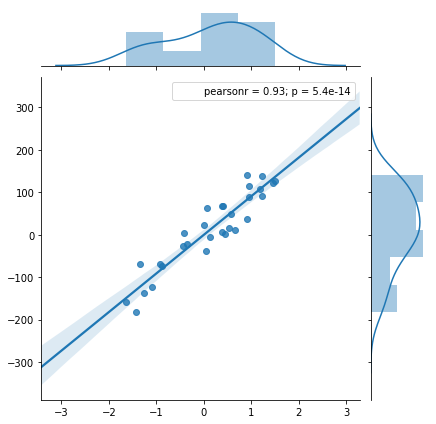

In [10]:
sns.jointplot(x=X_multi[:,3], y=y_multi, kind='reg');

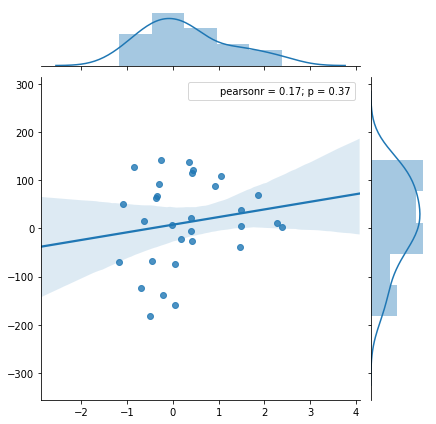

In [11]:
sns.jointplot(x=X_multi[:,0], y=y_multi, kind='reg');

In [12]:
# write your solution here

# 1. create a dataset using datasets.make_regression (check n_features and n_informative arguments) 

# 2. initialize a linear model and fit the model using created data

# 3. use jointplot to plot one informative and one non-informative feature to see the difference 

## Classification

For categorical output you can use another regression model called [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

However, we will show another type of models - [K-nearest neighbor classifier](http://scikit-learn.org/stable/modules/neighbors.html#classification)
The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. 

We can use classification algorithm to create model for the cancer data we saw previously. From the description we know that there are 30 features, but let's concentrate on two of them first. Using ``sns.pairplot`` we will check how mean radius and mean texture looks in both classes:

In [13]:
cancer.feature_names[:2]

array(['mean radius', 'mean texture'],
      dtype='<U23')

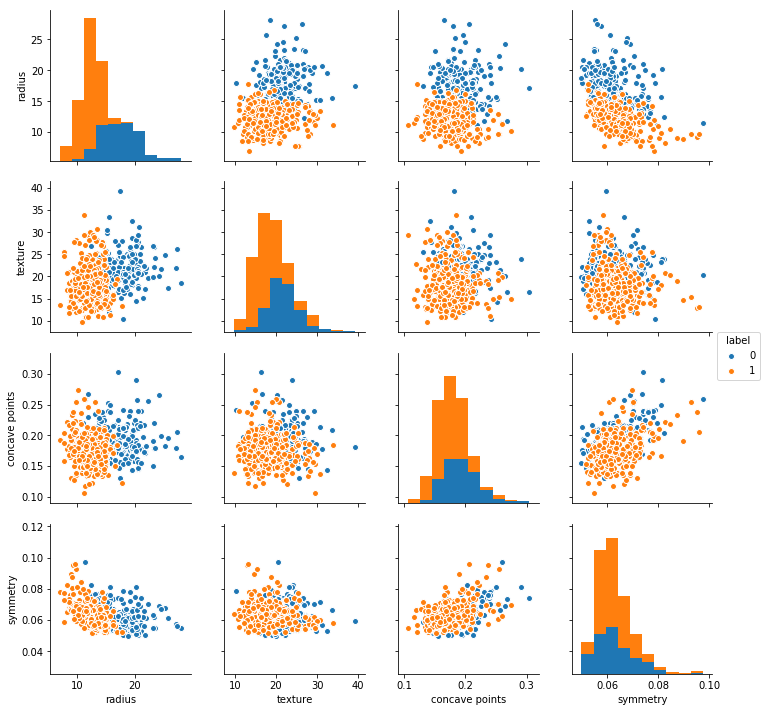

In [14]:
# X_can is a numpy array and we have to create a data frame first
import pandas as pd
df_can = pd.DataFrame({'radius':X_can[:,0], 'texture':X_can[:,1], 'concave points': X_can[:,8], 'symmetry':X_can[:,9], 'label':y_can})

sns.pairplot(df_can, vars = ['radius', 'texture', 'concave points', 'symmetry'], hue ='label');

As you can see, the data points are not completely separable, but it's clear that the mean radius is an important factor to distinguish between two types of cancer. 

Now let's try to use scikit-learn implementation of [K-neighbors model](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) with default parameters (i.e. 5 nearest neighbors, Minkowski metric). We will use only 2 features that we plotted, mean texture and mean radius.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_can[:, :2], y_can)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Now, let's plot our data points together with results of our model. We will ask for model prediction for the interesting range to plot a border between area that the model identifies as malignant and benign tumor. 

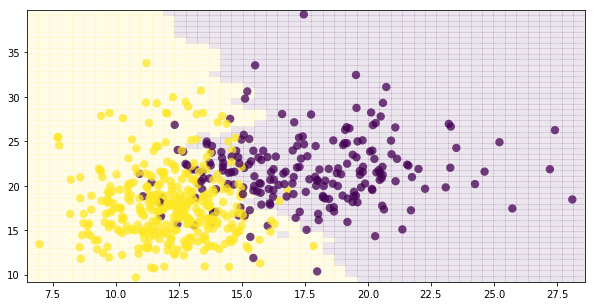

In [16]:
def plot_Kneig(clf, X, y, ind_x=0, ind_y=1):
    h = 50
    x_min, x_max = X[:, ind_x].min() - .5, X[:, ind_x].max() + .5
    y_min, y_max = X[:, ind_y].min() - .5, X[:, ind_y].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                         np.linspace(y_min, y_max, h))

    # estimates for the xx, yy meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=(10,5))
    plt.pcolormesh(xx, yy, Z, alpha=.1)
    ax.scatter(X[:, ind_x], X[:, ind_y], c=y, s=70, alpha=0.75, edgecolor='none')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xlabel('X[:,0]')
    #ax.set_ylabel('X[:,1]')

plot_Kneig(clf, X_can[:, :2], y_can)

As you can see the model did a pretty good job separating these two regions.

### Exercise 2

Run a classification for Iris data available in ``datasets``. You can try to run model twice, first time using 2 features that have high correlation with output and second time with two less correlated features. You might also read and change parameters of the ``KNeighborsClassifier``.


In [17]:
from sklearn import datasets
iris = datasets.load_iris()

X_ir = iris.data
y_ir = iris.target

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

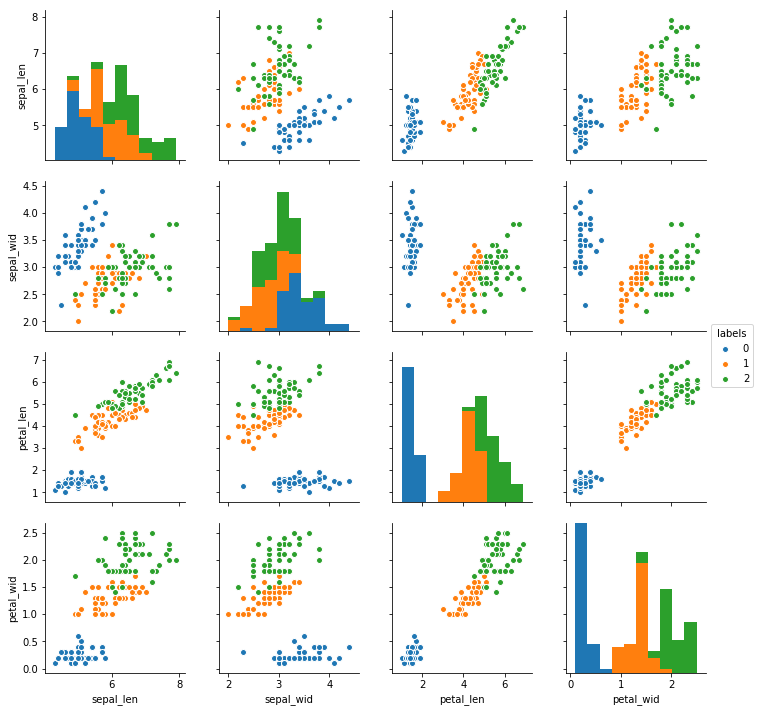

In [19]:
# lets's create a data frame and use pairplot to check our data
df_iris = pd.DataFrame({"sepal_len":X_ir[:,0], "sepal_wid":X_ir[:,1], 
                        "petal_len":X_ir[:,2], "petal_wid":X_ir[:,3], "labels":y_ir})
sns.pairplot(data=df_iris, vars=["sepal_len", "sepal_wid", "petal_len", "petal_wid"], hue="labels" )

As the description of the data says petal length and width are the main indicators. Let's build a model based on them and plot the results.

In [20]:
clf_iris = KNeighborsClassifier()
clf_iris.fit(X_ir[:,2:], y_ir)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

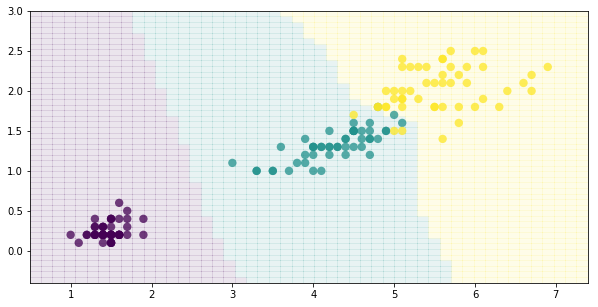

In [21]:
plot_Kneig(clf_iris, X_ir[:,2:], y_ir)

Classes are pretty well separated. We can check how the our model would work if we take two other features.

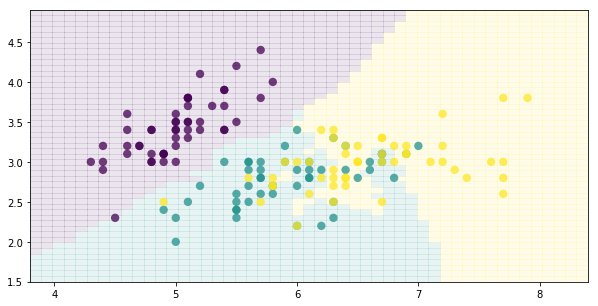

In [22]:
clf_iris_pr = KNeighborsClassifier()
clf_iris_pr.fit(X_ir[:,:2], y_ir)
plot_Kneig(clf_iris_pr, X_ir[:,:2], y_ir)

In [23]:
# write your solution here

# 1. load iris_data from datasets and read the description

# 2. use sns.pairplot to plot all four features and separate points with different labels (iris types)

# 3. initialize and KNeighborsClassifier twice for 2 more important and 2 less important features; use plot_Kneig to plot results

## Clustering: K means
K-means algorithm is an unsupervised algorithm and clusters data by trying to separate samples in n groups of equal variance. This algorithm requires the number of clusters to be specified. You can read more [here](http://scikit-learn.org/stable/modules/clustering.html#k-means)

To show how this algorithm works, let's load the dataset with hand-written digits:

In [24]:
digits = datasets.load_digits()
X_dig = digits.data
y_dig = digits.target

print(digits.DESCR) 

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

Let's check the size of our input data:

In [25]:
X_dig.shape

(1797, 64)

And plot a few examples:

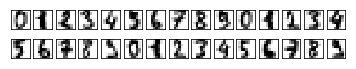

In [26]:
fig = plt.figure(figsize=(6, 1))
for i in range(30):
    ax = fig.add_subplot(2, 15, 1 + i, xticks=[], yticks=[])
    ax.imshow(X_dig[i].reshape((8, 8)), cmap=plt.cm.binary)

So we have 1797 samples, each has 64 features (representing pixels). We can plot our data after sorting output labels:


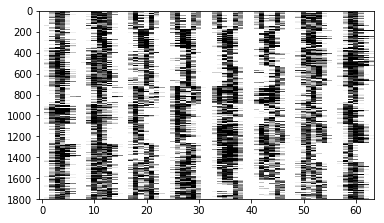

In [27]:
plt.imshow(X_dig[np.argsort(y_dig),], aspect=0.02, cmap=plt.cm.gray_r)
plt.show()

It's hard to see anything interesting, but we will try to use K-mean algorithm to cluster those samples in 10 clusters in 64-dimensional space.

In [28]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

We see now that we identified 10 cluster centers in 64 dimensions. Let's see how they look like:

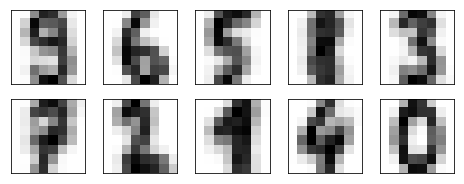

In [29]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)


You can see that they look very much like digits from 0 to 9 (probably except 8) and the algorithm was able to identify them without knowing anything about labels (output data). 

Let's check the accuracy of the model by comparing with labels that we have in our dataset. We should only change the order of our clusters firsts:

In [30]:
from scipy.stats import mode

model_labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    model_labels[mask] = mode(digits.target[mask])[0]

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, model_labels)

0.79354479688369506

So the accuracy of our simple model is 80%.

One question that we might ask, especially if our data set is larger, if it is really needed to have all 64 dimensions? What about reducing our data to 16 dimensions? Of course if we provide only left quater of all images the algorithm will not identify digits correctly. But we might be able to identify vectors in these 64-dimensional space that are "more important" than others.

## Principal Component Analysis (PCA)

[PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is an algorithm that identifies the most importan components in an n-dimensional spaces. Let's see a very easy examples in 2D:

<img src="../img/pca.png", width=400>

You can see that we can identify one direction that is more important to describe the data, and by "more important" we mean that it explains most variance. 

We will try to use PCA to our digit dataset

Let's see again how the data looks like in 64 dimensions:

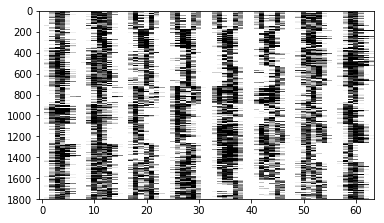

In [32]:
plt.imshow(X_dig[np.argsort(y_dig),], aspect=0.02, cmap=plt.cm.gray_r)
plt.show()

And now let's use PCA to identify the principle components:

(1797, 64)


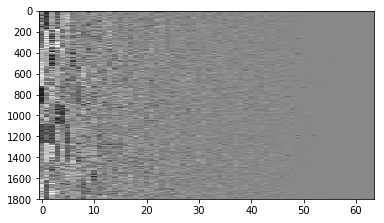

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=64).fit(X_dig)
X_reduced =pca.transform(X_dig)
print(X_reduced.shape)

plt.imshow(X_reduced[np.argsort(y_dig),], aspect=0.02, cmap=plt.cm.gray_r)

You can see that the main variability is described by the first few components.

Let's make a scatter plot taking only 2 first components:

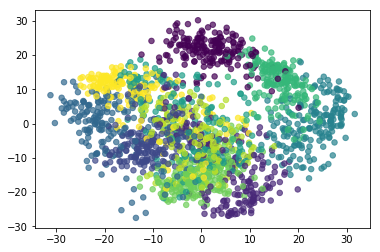

In [34]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_dig, s=30, alpha=0.7)

We can see that even if we can't fully separate data points associated to different digits, we can see that they are clustered. And we only used 2 components!

Let's try to repeat K-means analysis taking 16 dimensions/components:

In [35]:
pca16 = PCA(n_components=16).fit(X_dig)
X_reduced16 =pca16.transform(X_dig)
print(X_reduced16.shape)

(1797, 16)


We indeed have much smaller arrays that can be easier to store etc. For fitting the model and plotting the results we will come back to the original dimensions (but keeping only 16 components):

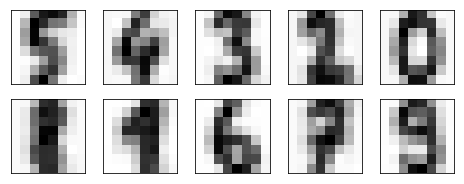

In [36]:
X_new = pca16.inverse_transform(X_reduced16)

est16 = KMeans(n_clusters=10)
clusters16 = est16.fit_predict(X_new)
centers16 = est16.cluster_centers_

fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est16.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)


And let's check the score:

In [37]:
model_labels16 = np.zeros_like(clusters16)
for i in range(10):
    mask = (clusters16 == i)
    model_labels16[mask] = mode(digits.target[mask])[0]    
    
accuracy_score(digits.target, model_labels16)   
    

0.78964941569282132

As you can see our accuracy decreased less than 1 percent.

### Exercise 3
Use PCA with 2 components for the Iris dataset.

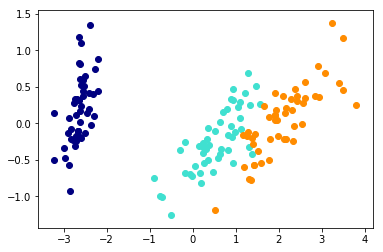

In [38]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_ir)

colors = ['navy', 'turquoise', 'darkorange']
    
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y_ir == i, 0], X_pca[y_ir == i, 1],
                color=color)

The types are very well separated. That shouldn't surprise us, since we previously noticed that there are two important features that can explain most differences between these three types of Iris.

In [39]:
# write your solution here

# 1. initialize PCA with 2 components and fit it using previously used input data from Iris dataset 

# 2. plot the data in 2 selected by PCA dimensions